In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
class LinearRegressionScratch:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.theta = None
        self.X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    def fit(self):
        self.theta = np.linalg.inv(self.X_bias.T.dot(self.X_bias)).dot(self.X_bias.T).dot(self.y)

    def predict(self, X):
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        return X_bias.dot(self.theta)

    def evaluate(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred) ** 2)
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return mse, r2

    def preprocess_data(self):
        self.X = self.X.apply(pd.to_numeric, errors='coerce')
        self.X = self.X.fillna(self.X.mean())
        self.y = self.y.apply(pd.to_numeric, errors='coerce')
        self.y = self.y.fillna(self.y.mean())

    def plot(self, X, y, y_pred, feature_name):
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label='Actual data')
        plt.plot(X, y_pred, color='red', label='Prediction line')
        plt.xlabel(feature_name)
        plt.ylabel('Target')
        plt.title(f'{feature_name} Prediction')
        plt.legend()
        plt.grid(True)
        plt.show()

Salary Dataset - MSE: 31270951.72, R-squared: 0.96


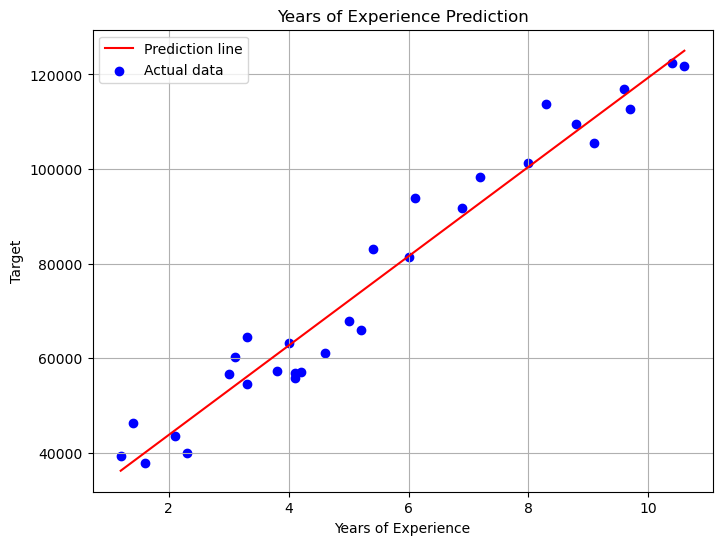

In [ ]:
salary_data = pd.read_csv('../Dataset/Salary_dataset.csv')
X_salary = salary_data['YearsExperience'].values.reshape(-1, 1)
y_salary = salary_data['Salary'].values
model_salary = LinearRegressionScratch(X_salary, y_salary)
model_salary.fit()
y_salary_pred = model_salary.predict(X_salary)
mse_salary, r2_salary = model_salary.evaluate(y_salary, y_salary_pred)
print(f"Salary Dataset - MSE: {mse_salary:.2f}, R-squared: {r2_salary:.2f}")
model_salary.plot(X_salary, y_salary, y_salary_pred, 'Years of Experience')

In [ ]:
performance_data = pd.read_csv('../Dataset/Student_Performance.csv')
performance_data['Extracurricular Activities'] = performance_data['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)
X_perf = performance_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y_perf = performance_data['Performance Index'].values
model_perf = LinearRegressionScratch(pd.DataFrame(X_perf), pd.Series(y_perf))
model_perf.preprocess_data()
model_perf.fit()
y_perf_pred = model_perf.predict(X_perf)
mse_perf, r2_perf = model_perf.evaluate(y_perf, y_perf_pred)
print(f"Student Performance Dataset - MSE: {mse_perf:.2f}, R-squared: {r2_perf:.2f}")

Student Performance Dataset - MSE: 4.15, R-squared: 0.99
